# Paquetes

In [86]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, fbeta_score, r2_score, mean_squared_error
import pandas as pd
import numpy as np 
import getpass
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split # Para partir la base de datos en train y test
from sklearn.decomposition import PCA
# El primer paso siempre será estandarizar nuestras variables
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
import plotnine as p9
from sklearn.preprocessing import StandardScaler
# Paso 1. Escalar variables numéricas
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Paso 3. Vamos a imputar con la moda las variables categoricas.
from sklearn.preprocessing import OneHotEncoder
# Paso 4. Dummyficamos las variables categoricas. 
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## Base de datos 

In [112]:
df = pd.read_excel( "Base_vinculados_Corregida.xlsx",sheet_name="Base_corta", engine='openpyxl')

In [113]:
df=df.rename(columns={'Adiciones Totales': "AdicionesTotales"})
df.shape

(11577, 30)

### Var Y

In [114]:
df1=df[df.AdicionesTotales >=400000]
df1.shape

(1846, 30)

In [115]:
df["Y"]=np.where(df["AdicionesTotales"]>=400000,1,0)
df

,Fecha Registro,Id Modificado,Tipo Cliente,Primer Nombre,Genero,Perfil Riesgo,Riesgo,Codigo CIIU,CIIU,Fecha de Nacimiento,...,Total_Pasivos,Saldo,Transacciones,Transacciones Adiciones,Transacciones Retiros,AdicionesTotales,Retiros Totales,Adiciones Promedio,Retiros Promedio,Y
0,2017-08-24,1,Ualet puro,DANIEL,M,1,Valiente,10,Medio,1991-11-12,...,40000000,0.00,8,6,2,600000.0,594209.73,100000.0,297104.865,1
1,2017-08-24,2,Ualet puro,JESSICA,F,3,Estratega,112,Alto,1992-05-25,...,0,0.00,2,1,1,10000.0,10081.56,10000.0,10081.560,0
2,2017-08-24,3,Ualet puro,DAVID,M,2,Aventurero,7210,Sin Clasificar,1995-06-22,...,7000000,0.00,0,0,0,0.0,0.00,0.0,0.000,0
3,2017-08-24,4,Ualet puro,DIEGO,M,2,Aventurero,1,Alto,1988-05-01,...,80000000,0.00,0,0,0,0.0,0.00,0.0,0.000,0
4,2017-08-24,5,Ualet puro,NICOLÁS,M,1,Valiente,1,Alto,1995-05-05,...,0,0.00,6,5,1,417000.0,421576.20,83400.0,421576.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11572,2021-02-03,29909,Ualet puro,ANDRES,M,2,Aventurero,90,Bajo,1981-01-31,...,40000000,28023681.01,4,2,2,36990000.0,8334599.83,18495000.0,4167299.915,1
11573,2021-02-08,30164,Ualet puro,FERNEY,M,1,Valiente,81,Bajo,1998-09-03,...,300000000,49085033.09,2,2,0,50000000.0,0.00,25000000.0,0.000,1
11574,2021-02-18,30587,Ualet puro,LUCERO,M,2,Aventurero,10,Medio,1992-02-16,...,1,9869808.91,1,1,0,10000000.0,0.00,10000000.0,0.000,1
11575,2021-03-02,31178,Ualet puro,LORENZO,M,1,Valiente,10,Medio,2002-05-08,...,3000000,9912918.01,1,1,0,10000000.0,0.00,10000000.0,0.000,1


### Missing

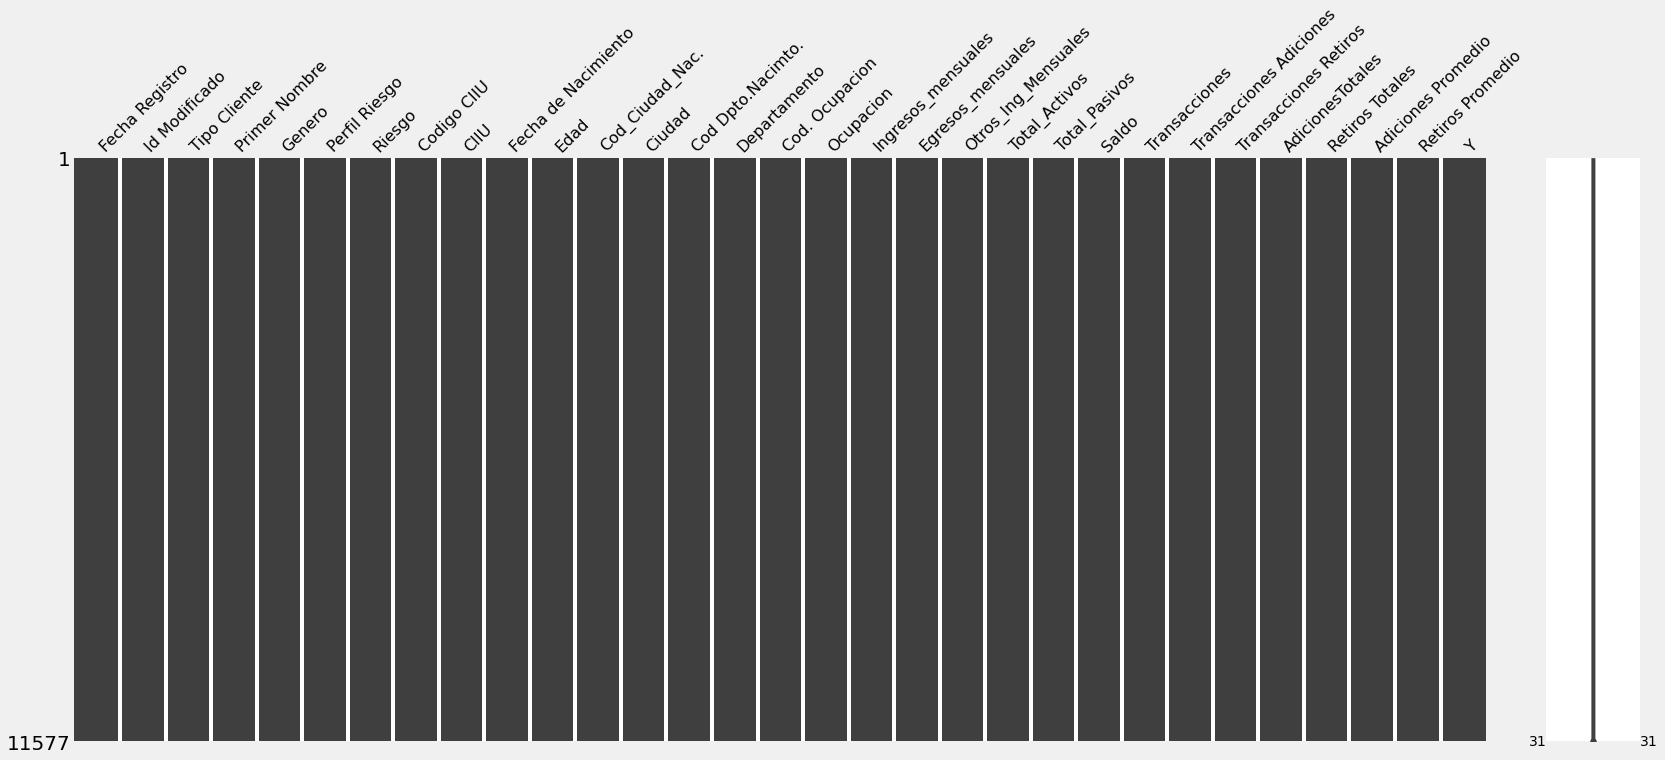

In [116]:
fig=msno.matrix(df) 
fig_copy = fig.get_figure()
fig_copy.savefig('misingUalet.png', bbox_inches = 'tight')

In [117]:
df.drop("Y", axis=1)

,Fecha Registro,Id Modificado,Tipo Cliente,Primer Nombre,Genero,Perfil Riesgo,Riesgo,Codigo CIIU,CIIU,Fecha de Nacimiento,...,Total_Activos,Total_Pasivos,Saldo,Transacciones,Transacciones Adiciones,Transacciones Retiros,AdicionesTotales,Retiros Totales,Adiciones Promedio,Retiros Promedio
0,2017-08-24,1,Ualet puro,DANIEL,M,1,Valiente,10,Medio,1991-11-12,...,340000000,40000000,0.00,8,6,2,600000.0,594209.73,100000.0,297104.865
1,2017-08-24,2,Ualet puro,JESSICA,F,3,Estratega,112,Alto,1992-05-25,...,0,0,0.00,2,1,1,10000.0,10081.56,10000.0,10081.560
2,2017-08-24,3,Ualet puro,DAVID,M,2,Aventurero,7210,Sin Clasificar,1995-06-22,...,120000000,7000000,0.00,0,0,0,0.0,0.00,0.0,0.000
3,2017-08-24,4,Ualet puro,DIEGO,M,2,Aventurero,1,Alto,1988-05-01,...,100000000,80000000,0.00,0,0,0,0.0,0.00,0.0,0.000
4,2017-08-24,5,Ualet puro,NICOLÁS,M,1,Valiente,1,Alto,1995-05-05,...,0,0,0.00,6,5,1,417000.0,421576.20,83400.0,421576.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11572,2021-02-03,29909,Ualet puro,ANDRES,M,2,Aventurero,90,Bajo,1981-01-31,...,100000000,40000000,28023681.01,4,2,2,36990000.0,8334599.83,18495000.0,4167299.915
11573,2021-02-08,30164,Ualet puro,FERNEY,M,1,Valiente,81,Bajo,1998-09-03,...,600000000,300000000,49085033.09,2,2,0,50000000.0,0.00,25000000.0,0.000
11574,2021-02-18,30587,Ualet puro,LUCERO,M,2,Aventurero,10,Medio,1992-02-16,...,218324431,1,9869808.91,1,1,0,10000000.0,0.00,10000000.0,0.000
11575,2021-03-02,31178,Ualet puro,LORENZO,M,1,Valiente,10,Medio,2002-05-08,...,300000000,3000000,9912918.01,1,1,0,10000000.0,0.00,10000000.0,0.000


In [118]:
df["Y"]

0        1
1        0
2        0
3        0
4        1
        ..
11572    1
11573    1
11574    1
11575    1
11576    0
Name: Y, Length: 11577, dtype: int64

In [119]:
y=df["Y"]
X=df[["Genero","CIIU","Edad","Ingresos_mensuales","Egresos_mensuales","Otros_Ing_Mensuales","Total_Activos","Total_Pasivos","Ocupacion"]]
X = pd.merge(X, pd.get_dummies(X['Genero'], drop_first = True), left_index = True, right_index = True)
X = pd.merge(X, pd.get_dummies(X['CIIU'], drop_first = True), left_index = True, right_index = True)
X = pd.merge(X, pd.get_dummies(X['Ocupacion'], drop_first = True), left_index = True, right_index = True)
X.drop(['Genero', 'CIIU',"Ocupacion"], axis = 1, inplace = True)
feature_list = list(X.columns)

## Over sampling 

In [120]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

In [121]:
pd.value_counts(y_sm)/len(y_sm)

1    0.5
0    0.5
Name: Y, dtype: float64

In [122]:
X_train, X_test, y_train, y_test=train_test_split(X_sm, y_sm, test_size= 0.3, random_state = 6, stratify = y_sm)

In [123]:
pd.value_counts(y_train)/len(y_train)

1    0.500037
0    0.499963
Name: Y, dtype: float64

In [124]:
pd.value_counts(y_test)/len(y_test)

0    0.500086
1    0.499914
Name: Y, dtype: float64

In [125]:
X_train

,Edad,Ingresos_mensuales,Egresos_mensuales,Otros_Ing_Mensuales,Total_Activos,Total_Pasivos,M,Bajo,Medio,Sin Clasificar,EMPLEADO,ESTUDIANTE,INDEPENDIENTE
17312,33,2254054,1715540,0,18245945,16491890,1,1,0,0,0,0,0
5289,46,1000000,500000,0,10000000,5000000,1,0,1,0,1,0,0
17487,31,5581284,3640742,1510286,90000000,31224284,1,0,1,0,1,0,0
687,29,800000,700000,70000,800000,700000,1,0,0,1,1,0,0
8119,28,1000000,700000,0,1000000,700000,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13465,30,4425706,2787146,2212853,65742935,33722880,1,0,1,0,1,0,0
8118,28,900000,620000,800000,900000,800000,1,0,1,0,1,0,0
2583,26,5000000,400000,1000000,30000000,6000000,1,1,0,0,0,1,0
12671,30,8813344,1469087,2948479,16879786,503434,1,0,0,0,0,0,0


## Modelos

### Red Neuronal 

In [67]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings

In [ ]:
# Modelos
# ==============================================================================
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_2 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_1.fit(X=X_train, y=y_train)
modelo_2.fit(X=X_train, y=y_train)
modelo_3.fit(X=X_train, y=y_train)
modelo_4.fit(X=X_train, y=y_train)

In [ ]:
predicciones1 = modelo_1.predict(X_test)
predicciones2 = modelo_2.predict(X_test)
predicciones3 = modelo_3.predict(X_test)
predicciones4 = modelo_4.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones1))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones2))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones3))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones4))

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10),(50), (10, 10), (20, 20),(50, 50, 50),(10,10,10), (20,20,20)],
    'alpha': np.logspace(-20, 20, 20),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 100, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(20)

### Xgboost

In [16]:
pip install xgboost

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.880 (0.008)


>10 0.828 (0.007)
>50 0.869 (0.007)
>100 0.880 (0.008)
>500 0.883 (0.009)
>1000 0.880 (0.009)
>5000 0.875 (0.008)


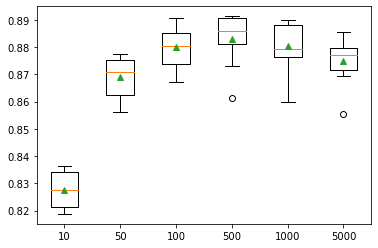

In [34]:
# explore xgboost number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 

# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [10, 50, 100, 500, 1000, 5000]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=2021)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [36]:
pip install xgboost

  Using cached xgboost-1.5.1-py3-none-manylinux2014_x86_64.whl (173.5 MB)
Note: you may need to restart the kernel to use updated packages.


>200 0.881 (0.007)
>300 0.880 (0.006)
>400 0.879 (0.006)
>500 0.878 (0.005)


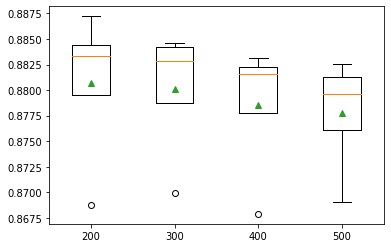

In [37]:
# explore xgboost number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 

# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [ 200, 300, 400, 500]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=2021)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.814 (0.006)
>2 0.853 (0.006)
>3 0.868 (0.005)
>4 0.877 (0.006)
>5 0.880 (0.008)
>6 0.882 (0.006)
>7 0.881 (0.006)
>8 0.882 (0.008)
>9 0.881 (0.007)
>10 0.882 (0.007)


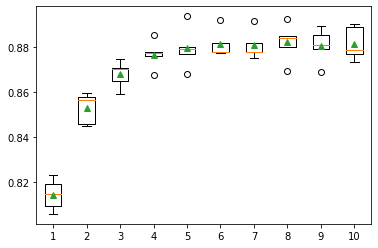

In [39]:
def get_models():
    models = dict()
    for i in range(1,11):
        models[str(i)] = XGBClassifier(max_depth=i, n_estimators=200)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [42]:
pip install tqdm

     |████████████████████████████████| 76 kB 7.5 MB/s             
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 4/4 [00:00<00:00, 24855.13it/s]


>0.1000 0.881 (0.005)
>0.4000 0.877 (0.006)
>0.8000 0.871 (0.006)
>1.0000 0.868 (0.003)


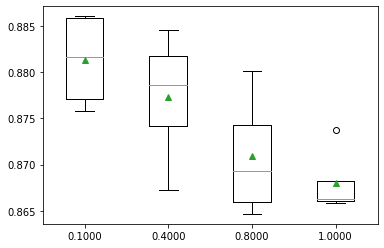

In [45]:

from tqdm import tqdm
def get_models():
    models = dict()
    rates = [0.1,0.4,0.8, 1.0]
    for r in tqdm(rates):
        key = '%.4f' % r
        models[key] = XGBClassifier(eta=r, max_depth=10, n_estimators=200)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


 10%|█         | 1/10 [02:44<24:39, 164.37s/it]

>0.1 0.823 (0.005)


 20%|██        | 2/10 [05:37<22:35, 169.45s/it]

>0.2 0.853 (0.004)


 30%|███       | 3/10 [08:43<20:38, 176.90s/it]

>0.3 0.861 (0.004)


 40%|████      | 4/10 [11:38<17:37, 176.27s/it]

>0.4 0.867 (0.007)


 50%|█████     | 5/10 [14:48<15:05, 181.18s/it]

>0.5 0.871 (0.003)


 60%|██████    | 6/10 [17:52<12:09, 182.33s/it]

>0.6 0.875 (0.003)


 70%|███████   | 7/10 [21:04<09:15, 185.22s/it]

>0.7 0.875 (0.004)


 80%|████████  | 8/10 [24:13<06:13, 186.71s/it]

>0.8 0.877 (0.008)


 90%|█████████ | 9/10 [27:15<03:04, 184.96s/it]

>0.9 0.878 (0.005)


100%|██████████| 10/10 [30:12<00:00, 181.23s/it]

>1.0 0.879 (0.005)


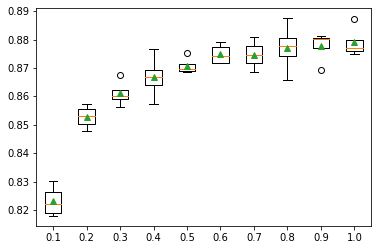

In [48]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(subsample=i, max_depth=6, n_estimators=200)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in tqdm(models.items()):
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## SVC

In [84]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [85]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-10, 10, 50)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
44,9.10298e+07,0.677531,0.007220,0.679843,0.006378
42,1.3895e+07,0.677237,0.004086,0.681495,0.005972
48,3.90694e+09,0.676503,0.003869,0.680467,0.004299
46,5.96362e+08,0.676503,0.005539,0.679292,0.004731
40,2.12095e+06,0.676430,0.004938,0.680540,0.005555
39,828643,0.676136,0.004582,0.679072,0.002780
47,1.52642e+09,0.675916,0.003866,0.678044,0.005361
45,2.32995e+08,0.675769,0.004149,0.677751,0.006478
43,3.55648e+07,0.675696,0.006127,0.677274,0.004810
49,1e+10,0.675475,0.006673,0.676540,0.006891


## GradientBoostingClassifier

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedKFold

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
390,0.1,10,auto,1000,0.5,0.881744,0.004065,0.999853,0.000104
389,0.1,10,auto,500,1,0.881377,0.003799,0.999853,0.000104
391,0.1,10,auto,1000,1,0.881083,0.004004,0.999853,0.000104
388,0.1,10,auto,500,0.5,0.881010,0.003507,0.999853,0.000104


In [107]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
390,0.1,10,auto,1000,0.5,0.881744,0.004065,0.999853,0.000104
389,0.1,10,auto,500,1,0.881377,0.003799,0.999853,0.000104
391,0.1,10,auto,1000,1,0.881083,0.004004,0.999853,0.000104
388,0.1,10,auto,500,0.5,0.881010,0.003507,0.999853,0.000104
246,0.01,10,auto,1000,0.5,0.879395,0.001156,0.997321,0.000226
405,0.1,10,log2,500,1,0.877854,0.002454,0.999853,0.000104
397,0.1,10,sqrt,500,1,0.877854,0.002454,0.999853,0.000104
375,0.1,5,sqrt,1000,1,0.877266,0.002723,0.990714,0.000187
383,0.1,5,log2,1000,1,0.877266,0.002723,0.990714,0.000187
429,0.1,20,log2,500,1,0.877266,0.002929,0.999853,0.000104


In [108]:
modelo = grid.best_estimator_
modelo

GradientBoostingClassifier(max_depth=10, max_features='auto', n_estimators=1000,
                           random_state=123, subsample=0.5)

In [127]:
modelo=GradientBoostingClassifier(max_depth=10, max_features='auto', n_estimators=1000,
                           random_state=123, subsample=0.5)

In [129]:
modelo.fit(X = X_train, y = y_train)

GradientBoostingClassifier(max_depth=10, max_features='auto', n_estimators=1000,
                           random_state=123, subsample=0.5)

In [130]:
predicciones = modelo.predict(X_test)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2920
           1       0.90      0.86      0.88      2919

    accuracy                           0.88      5839
   macro avg       0.88      0.88      0.88      5839
weighted avg       0.88      0.88      0.88      5839



In [132]:
ns_probs = modelo.predict_proba(X_test)

In [134]:
ns_probs

array([[9.99730755e-01, 2.69245434e-04],
       [3.17597227e-03, 9.96824028e-01],
       [9.99995966e-01, 4.03434189e-06],
       ...,
       [3.09082968e-01, 6.90917032e-01],
       [7.89754424e-05, 9.99921025e-01],
       [9.99999447e-01, 5.53312105e-07]])

In [137]:
y_test=pd.DataFrame(y_test)

In [144]:
y_test

,Y
4496,0
10799,1
9055,0
13479,1
17284,1
...,...
12365,1
18700,1
5786,0
13644,1


In [143]:
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

ValueError: y should be a 1d array, got an array of shape (5839, 2) instead.